# Inferential statistics

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

import statsmodels.stats as stats

import matplotlib.pyplot as plt

%matplotlib inline

## Constructing a confidence interval (CI)

### 8.30 Anorexia in teenage girls

* Variable: $X = weight\,at\,the\,end\,of\,the\,study - weight\,at\,the\,beginnig\,of\,the\,study$
* Number of girls: $n = 17$

In [12]:
X = np.array([11, 11, 6, 9, 14, -3, 0, 7, 22, -5, -4, 13, 13, 9, 4, 6, 11])
n = 17

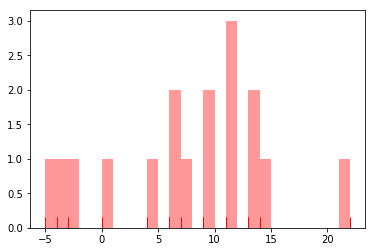

In [14]:
sns.distplot(X, hist=True, kde=False, rug=True, color="r", bins=27)

In [6]:
np.mean(X)

7.294117647058823

**Important** - use `ddof=1` when calculating sample std.

In [26]:
# standard deviation
np.std(X, ddof=1)

7.183006907646276

In [27]:
# standard error (2 methods)
np.std(X, ddof=1) / np.sqrt(len(X)), scipy.stats.sem(X)

(1.7421350699862868, 1.7421350699862868)

In [28]:
# confidence interval with t-score
scipy.stats.t.interval(alpha=0.95, loc=np.mean(X), df=len(X)-1, scale=scipy.stats.sem(X))

(3.600956280236127, 10.987279013881519)

### 8.31 Stock market activity

In [41]:
mondays = np.array([45, 43, 43, 66, 91, 53, 35, 45, 29, 64, 56])
fridays = np.array([43, 41, 45, 46, 61, 56, 80, 40, 48, 49, 50, 41])

In [43]:
sorted(mondays)

[29, 35, 43, 43, 45, 45, 53, 56, 64, 66, 91]

In [42]:
sorted(fridays)

[40, 41, 41, 43, 45, 46, 48, 49, 50, 56, 61, 80]

In [30]:
# mean
np.mean(mondays), np.mean(fridays)

(51.81818181818182, 50.0)

In [31]:
# standard deviation
np.std(mondays, ddof=1), np.std(fridays, ddof=1)

(17.191964296252955, 11.337788785537263)

In [46]:
# Q1, median, Q3
np.quantile(mondays, [0.25, 0.5, 0.75], interpolation='midpoint'), np.quantile(fridays, [0.25, 0.5, 0.75], interpolation='midpoint')

(array([43., 45., 60.]), array([42., 47., 53.]))

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


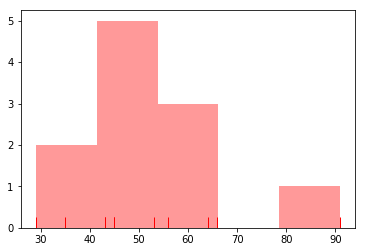

In [58]:
sns.distplot(mondays, hist=True, kde=False, rug=True, color="r")

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


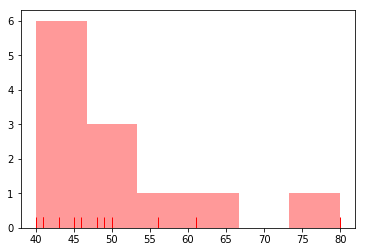

In [51]:
sns.distplot(fridays, hist=True, kde=False, rug=True, color="r")

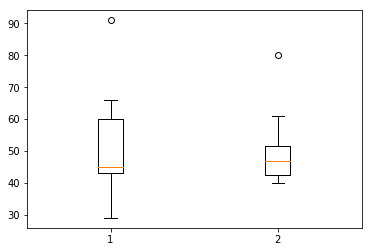

In [57]:
plt.boxplot([mondays, fridays]);

In order to construct a 95% confidence interval for $\mu$ data distribution should be normal. Here, we see that the distributin strongly skewed to the right. So the normality assumption is violated. 

From the boxplot we see that there is one outlier for each day (acording to the criterion of $1.5\times IQR$ below Q1 or above Q3).

In [54]:
# 95% confidence interval with t-score
scipy.stats.t.interval(alpha=0.95, loc=np.mean(fridays), df=len(fridays)-1, scale=scipy.stats.sem(fridays))

(42.7963126843408, 57.2036873156592)

We are removing the outlier.

In [59]:
fridays_without_outlier = [x for x in fridays if x <80]

In [61]:
# mean
np.mean(fridays), np.mean(fridays_without_outlier)

(50.0, 47.27272727272727)

In [62]:
# standard deviation
np.std(fridays, ddof=1), np.std(fridays_without_outlier, ddof=1)

(11.337788785537263, 6.5740536823319164)

In [60]:
# 95% confidence interval with t-score
scipy.stats.t.interval(alpha=0.95, loc=np.mean(fridays_without_outlier), 
                       df=len(fridays_without_outlier)-1, 
                       scale=scipy.stats.sem(fridays_without_outlier))

(42.85621791444762, 51.68923663100693)

### 8.32 Heights of seedings

In [63]:
heights = np.array([55.5, 60.3, 60.6, 62.1, 65.5, 69.2])

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


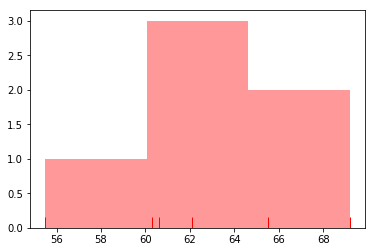

In [64]:
sns.distplot(heights, hist=True, kde=False, rug=True, color="r")

In [67]:
# 95% confidence interval with t-score
scipy.stats.t.interval(alpha=0.95, loc=np.mean(heights), df=len(heights)-1, scale=scipy.stats.sem(heights))

(57.25627811259478, 67.1437218874052)

In [68]:
# 99% confidence interval with t-score
scipy.stats.t.interval(alpha=0.99, loc=np.mean(heights), df=len(heights)-1, scale=scipy.stats.sem(heights))

(54.44541571210506, 69.95458428789493)

### 8.35 Grandmas using e-mail

In [69]:
hours_spend_on_reading_emails_weekly = np.array([0, 0, 1, 2, 5, 7, 14])

In [70]:
np.mean(hours_spend_on_reading_emails_weekly)

4.142857142857143

In [71]:
# standard deviation
np.std(hours_spend_on_reading_emails_weekly, ddof=1)

5.080307452263476

Population distribution is skewed to the right (mean - std < 0). The assumption of normality is violeted. Fortunatelly, calculating confidence intervals using t-distribution is robust to this assumption.

In [77]:
# standard error
scipy.stats.sem(hours_spend_on_reading_emails_weekly)

1.9201757289196144

In [78]:
# 90% confidence interval with t-score
scipy.stats.t.interval(alpha=0.9, 
                       loc=np.mean(hours_spend_on_reading_emails_weekly), 
                       df=len(hours_spend_on_reading_emails_weekly) - 1, 
                       scale=scipy.stats.sem(hours_spend_on_reading_emails_weekly)
                      )

(0.41160953153171187, 7.874104754182573)

## Choosing the sample size

## Bootstraping

In [4]:
import random

### 8.59 Estimating variability

Use the bootstrap method to get a 95% confidence interval for a "long-run" standard deviation of the values.

In [6]:
weight = [159.8, 159.8, 159.6, 159, 158.4, 159.2, 158.8, 158.4, 158.8, 159]

In [32]:
bootstrap_std = []
for i in range(10000):
    bootstrap = random.choices(weight, k=len(weight))
    std = np.std(bootstrap)
    bootstrap_std.append(std)

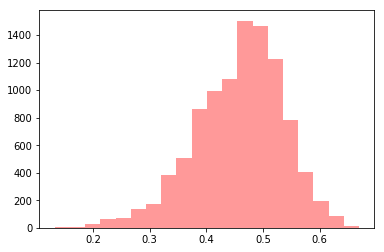

In [33]:
sns.distplot(bootstrap_std, hist=True, kde=False, rug=False, color="r", bins=20)

In [34]:
# 95% confidence interval for the population standard deviation
np.quantile(bootstrap_std, q=(0.025, 0.975))

array([0.28565714, 0.59329588])

### 8.60 Bootstrap the proportion

We want a 95% confidence interval for the population proportion of students in a high school, who correctly answer the question.

In [35]:
n = 50
p = 0.2

In [38]:
sample = [1] * 10 + [0] * 40

In [49]:
# we treat the sample proportion as a population proportion
np.mean(random.choices(sample, k=len(sample)))

0.16

In [47]:
bootstrap_mean = []
for i in range(100):
    mean = np.mean(random.choices(sample, k=len(sample)))
    bootstrap_mean.append(mean)
np.quantile(bootstrap_mean, q=(0.05, 0.95))

array([0.139, 0.3  ])

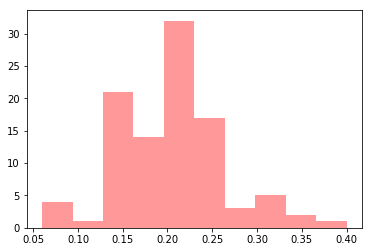

In [48]:
sns.distplot(bootstrap_mean, hist=True, kde=False, rug=False, color="r", bins=10)

## Chapter problems

### 8.87 Income for families in public housing

In [50]:
income = np.array([90, 77, 100, 83, 64, 78, 92, 73, 122, 96, 60, 85, 86, 108, 70, 
                   139, 56, 94, 84, 111, 93, 120, 70, 92, 100, 124, 59, 112, 79]) * 100

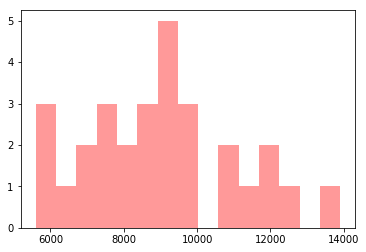

In [52]:
sns.distplot(income, hist=True, kde=False, rug=False, color="r", bins=15)

In [53]:
len(income)

29

In [54]:
np.mean(income)

9024.137931034482

In [55]:
# standard deviation
np.std(income, ddof=1)

2099.260953698739

In [56]:
# standard error
scipy.stats.sem(income)

389.8229727189677

In [57]:
# 95% confidence interval with t-score
scipy.stats.t.interval(alpha=0.95, 
                       loc=np.mean(income), 
                       df=len(income) - 1, 
                       scale=scipy.stats.sem(income)
                      )

(8225.621769681096, 9822.654092387867)

### 8.119 Opinions over time about the death penalty

In [58]:
n = 20
p = 0.95

In [59]:
scipy.stats.binom.pmf(k=20, n=n, p=p)

0.3584859224085419

Probability distribution

In [67]:
probability_dist = []
for i in range(n+1):
    probability_dist.append(scipy.stats.binom.pmf(k=i, n=n, p=p))
    
probability_dist

[9.536743164062679e-27,
 3.623962402343822e-24,
 6.54125213623056e-22,
 7.457027435302847e-20,
 6.021549654007052e-18,
 3.6611021896362847e-16,
 1.739023540077227e-14,
 6.608289452293486e-13,
 2.040309368395612e-11,
 5.168783733268868e-10,
 1.0802758002531922e-08,
 1.865930927710054e-07,
 2.658951571986829e-06,
 3.1089279918615305e-05,
 0.00029534815922684375,
 0.0022446460101240018,
 0.013327585685111292,
 0.05958214776873288,
 0.18867680126765382,
 0.37735360253530753,
 0.3584859224085419]

In [68]:
np.sum(probability_dist)

0.9999999999999998

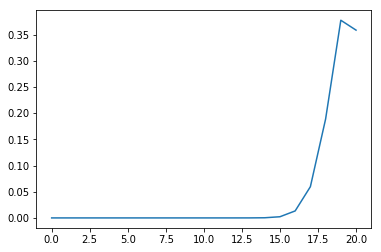

In [69]:
plt.plot(range(0, 21), probability_dist)

Mean

In [70]:
mean = 0
for i in range(21):
    mean += (i * probability_dist[i])
    
mean

18.999999999999993